# <center>Machine Learning Project</center>

Description of the project

** **
## <center>*01 - Exploratory Data Analysis & Preprocessing Notebook*</center>

** **

**Description of the notebook**


Overview of the dataset: summary statistics, data types and missing values

EDA: univariate analysis, multivariate analysis, class distributions

Visualizations: heatmaps, histograms, box plots

Incoherencies

Insides and potential issues

Handling missing values

Encoding categorical variables

Feature Engineering

Feature scaling

Feature Selection


The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Maria Cruz - 20230760
- Sofia Gomes - 20240848
- Tahiya Laboni - 20240943

# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)<br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Incoherencies](#2.3-Incoherencies)

    2.4 [Feature Engineering](#2.4-Geature-Engineering)
    
    2.5 [Outliers](#2.5-Outliers)
    
    2.6 [Visualisations](#2.6-Visualisations) <br><br>


3. [Data Encoding](#3.-Data-Encoding)

# 1. Importing Libraries & Data

In [53]:
# Import libraries
import pandas as pd
from scipy import stats

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from utils import *

In [54]:
# Import dataset
df = pd.read_csv('./project_data/train_data.csv')
df

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_3852\1134853745.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Duplicates

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [55]:
# Search for duplicated 'Claim Identifier'
df['Claim Identifier'].duplicated().sum()

np.int64(1)

Above, it can be verified the existence of wo rows with the sam `Claim Identifier`. TO better understand why that happened, below the rows with the same id can be seen.

In [56]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = df['Claim Identifier'].duplicated(keep=False)

df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two. Afterwards, the possibility of existing similar rows almost empty will be explored.

In [45]:
df.drop_duplicates(subset='Claim Identifier', keep='first', inplace=True)

In [49]:
df = df.set_index('Claim Identifier')

AFter dropping the repeated `Claim Identifier`, the variable was used as index.

# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>


In [4]:
# Show the fisrt 5 lines of the dataset
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [5]:
# Show the total numbers of lines and columns
df.shape

(593471, 33)

In [6]:
# Show the general summary of the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Descriptive Variables

In [58]:
# Show some statistics about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,1.425643e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,4.910883e+02,6.092918e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1.886768e+03,4.146444e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,2.366760e+07,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.207337e+00,2.832303e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,5.864531e+01,1.964417e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,2.587428e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,2.220752e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,2.236594e+01,-9.0,33.0,38.0,53.0,99.0


## 2.1 Missing Values

<a href="#top">Top &#129033;</a>

## 2.2 Duplicates

<a href="#top">Top &#129033;</a>


## 2.3 Incoherencies

<a href="#top">Top &#129033;</a>


* Birth year está em float -> colocar como int

* Average Weekly Wage esta com valores a 0

* Age at Injury e Birth Year devem ser verificados (por exemplo, garantindo que a Age at Injury corresponda razoavelmente ao Birth Year).

* Garanta que as datas sejam consistentes em termos de sequências de eventos (por exemplo, a Accident Date deve logicamente preceder a Assembly Date).

## 2.4 Feature Engineering

<a href="#top">Top &#129033;</a>


## 2.5 Outliers

<a href="#top">Top &#129033;</a>


## 2.6 Visualisations

<a href="#top">Top &#129033;</a>

### Numerical Variables

In [8]:
# Create a dataframe with only numeric values
df_descriptive_vars = pd.DataFrame(df[['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code','WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']])
df_descriptive_vars

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
0,31.0,0.00,1988.0,5393875,NaN,44.0,27.0,10.0,62.0,0.0,1.0
1,46.0,1745.93,1973.0,5393091,4.0,23.0,97.0,49.0,38.0,1.0,4.0
2,40.0,1434.80,1979.0,5393889,NaN,56.0,79.0,7.0,10.0,0.0,6.0
3,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61.0,NaN,1958.0,5393887,NaN,62.0,16.0,43.0,36.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,72.0,0.00,1950.0,6165075,NaN,48.0,25.0,90.0,-9.0,0.0,3.0
593468,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN


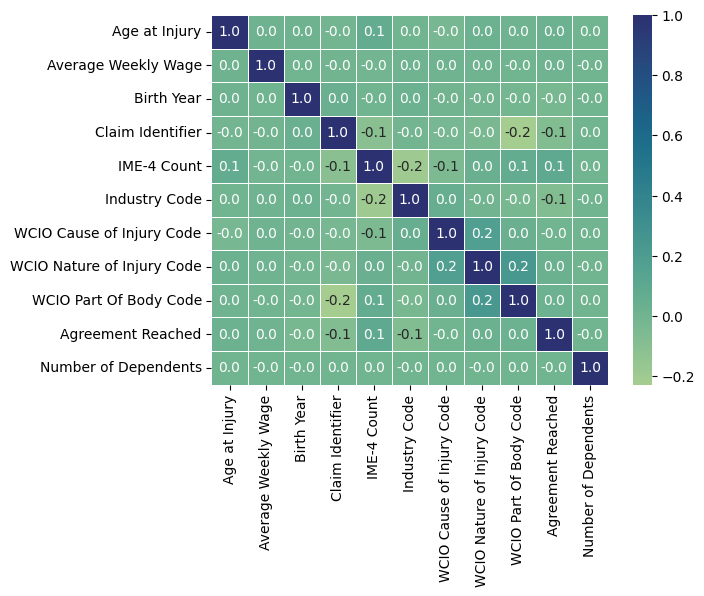

In [9]:
# Look for relationships between descriptive variables
correlation_matrix = df_descriptive_vars.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
plt.show()

### Categorical Variables

In [10]:
# Select dates
cols_to_drop = df.columns[df.columns.str.contains('Date')]

In [11]:
# Create dataframe with categorical features only
categorical_df = df.loc[:,(df.dtypes == 'object') == True].drop(cols_to_drop, axis = 1)

In [12]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64
Missing values: 19445

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64
Missing values: 19445

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64
Missing values: 19445

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774

In the output above, the unique values of the categorical features can be seen. Here are some conclusions about the categorical varaibles:
- *Alternative Dispute Resolution* has 5 rows with the value *U*.
- *Carrier Name* has several values with *STATE INSURANCE FUND* being the biggest group.
- *Claim Injury Type* is the target with 8 possible values, excluding the missing values which will be removed.
- * County of Injury

In [13]:
df[df['Alternative Dispute Resolution'] == 'U'].T

,145799,493388,494317,551004,551394
Accident Date,2018-03-12,2021-11-05,2022-07-06,2022-09-01,2022-08-29
Age at Injury,57.0,56.0,52.0,57.0,55.0
Alternative Dispute Resolution,U,U,U,U,U
Assembly Date,2020-10-21,2022-07-11,2022-07-13,2022-10-17,2022-10-17
Attorney/Representative,N,N,Y,N,N
Average Weekly Wage,0.0,0.0,0.0,NaN,0.0
Birth Year,1961.0,1965.0,1969.0,1965.0,1967.0
C-2 Date,NaN,NaN,NaN,NaN,NaN
C-3 Date,NaN,NaN,2023-03-09,NaN,NaN
Carrier Name,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS


In [14]:
# Compare Carrier Name and Carrier Type
# Whats the difference between Gender = X or Gender = U

In [15]:
'''
Multiclass variable: Decision of the WCB relative to the claim:
“Accident” means that claim refers to workplace accident,
“Occupational Disease” means illness from the workplace. ->
requires WCB deliberation so it is unknown at start of claim.
'''
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

In [18]:
df['Claim Injury Type'] # Label Encoding is possible because numbering indicates severity

0          2. NON-COMP
1         4. TEMPORARY
2         4. TEMPORARY
3                  NaN
4          2. NON-COMP
              ...     
593466             NaN
593467     2. NON-COMP
593468             NaN
593469             NaN
593470             NaN
Name: Claim Injury Type, Length: 593471, dtype: object

In [19]:
df[df['Claim Injury Type'].isna()].isna().sum()

Accident Date                         19445
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   19445
Birth Year                            19445
C-2 Date                              19445
C-3 Date                              19445
Carrier Name                          19445
Carrier Type                          19445
Claim Identifier                          0
Claim Injury Type                     19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                    19445
Gender                                19445
IME-4 Count                           19445
Industry Code                         19445
Industry Code Description             19445
Medical Fee Region                    19445
OIICS Nature of Injury Descripti

In [20]:
19445/593471

0.03276486972404717

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values. With that in mind, several options were explored:
- One-hot encoding:
- Label encoding:
- Target encoding:


#### Number of injuries per county

In [62]:
# Remove the na to make the visualization possible
df_cleaned = df.dropna(subset=['Claim Injury Type'])

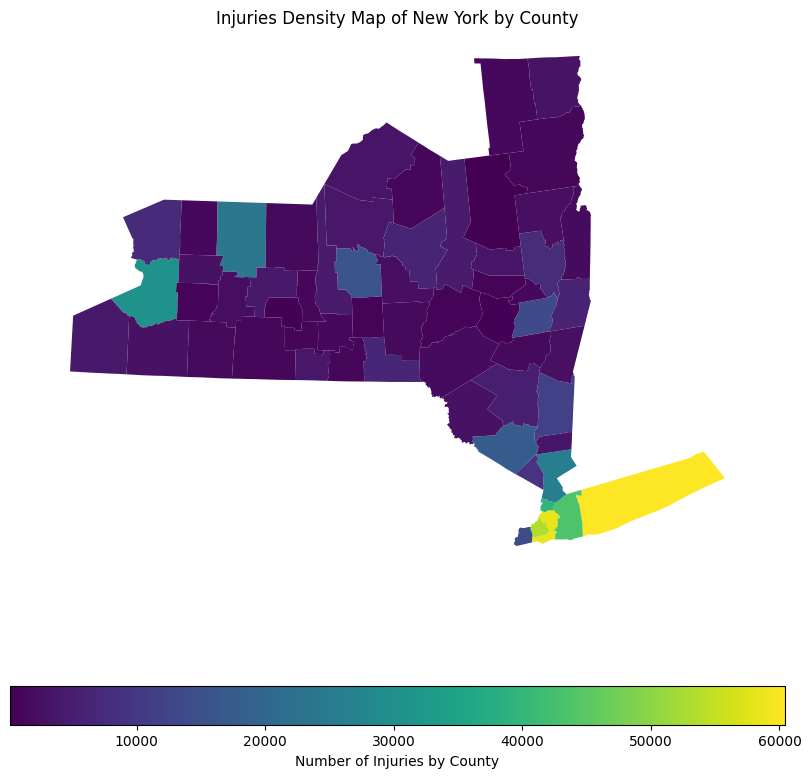

In [63]:
# Example usage:
plot_injuries_by_county(df_cleaned)

# 3. Data Encoding

<a href="#top">Top &#129033;</a>

In [30]:
# Define the ordinal mapping
ordinal_mapping = {
    '1. CANCELLED': 1,
    '2. NON-COMP': 2,
    '3. MED ONLY': 3,
    '4. TEMPORARY': 4,
    '5. PPD SCH LOSS': 5,
    '6. PPD NSL': 6,
    '7. PTD': 7,
    '8. DEATH': 8
}

In [34]:
# Map the categories to their ordinal values
df_cleaned['Claim Injury Type Encoded'] = df_cleaned['Claim Injury Type'].map(ordinal_mapping)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_3852\3029938999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Claim Injury Type Encoded'] = df_cleaned['Claim Injury Type'].map(ordinal_mapping)


# Feature Selection

**Training Data Only**

### Chi-Squared Test

In [ ]:
for var in categorical_df.columns:
    TestIndependence(df[var],df['Claim Injury Type'], var)